## 6.5 Machine Learning /Clustering

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [3]:
%matplotlib inline

In [5]:
# Import data

df_cwur = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'cwurData.csv'), index_col = False)

In [6]:
df_cwur.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [7]:
df_cwur.shape

(2200, 14)

In [8]:
#Finding Missing Values
df_cwur.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [9]:
# Impute missing values in 'broad_impact' with the mean per institution
df_cwur['broad_impact'] = df_cwur.groupby('institution')['broad_impact'].transform(lambda x: x.fillna(x.mean()))


In [10]:
# Verify if missing values are handled
print(df_cwur['broad_impact'].isnull().sum()) 


1


In [11]:
#Finding Missing Values
df_cwur.isnull().sum()

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            1
patents                 0
score                   0
year                    0
dtype: int64

In [13]:
# Find the row(s) where 'broad_impact' is still missing
missing_broad_impact = df_cwur[df_cwur['broad_impact'].isnull()]

# Display the affected institution(s)
print(missing_broad_impact[['institution', 'country', 'broad_impact']])

         institution country  broad_impact
94  Williams College     USA           NaN


In [15]:
# replace the missing value with overall mean 
overall_mean = df_cwur['broad_impact'].mean()
df_cwur['broad_impact']=df_cwur['broad_impact'].fillna(overall_mean)

In [18]:
#Finding Missing Values
df_cwur.isnull().sum()

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64

In [19]:
#Export df_cwur_cleaned
df_cwur.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_cwur_cleaned.csv')) 

In [20]:
#Create a subset of the data including only numerical values
df_cwur_num = df_cwur.select_dtypes(include=['number'])

#Print the head to ensure it worked
df_cwur_num.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,1,7,9,1,1,1,1,1.0,5,100.00,2012
1,2,2,9,17,3,12,4,4,2.0,1,91.67,2012
2,3,3,17,11,5,4,2,2,4.0,15,89.50,2012
3,4,1,10,24,4,16,16,11,13.0,50,86.17,2012
4,5,4,2,29,7,37,22,22,24.5,18,85.21,2012


### 2. The elbow technique

In [22]:
# Define the range of potential clusters in the data.
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [25]:
score = [kmeans[i].fit(df_cwur_num).score(df_cwur_num) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1250479854.3860848,
 -472295083.4972148,
 -329954866.2018836,
 -279740578.8868965,
 -258274396.75331432,
 -230778485.5659148,
 -218856374.1712405,
 -202916160.00805858,
 -196195039.68706083]

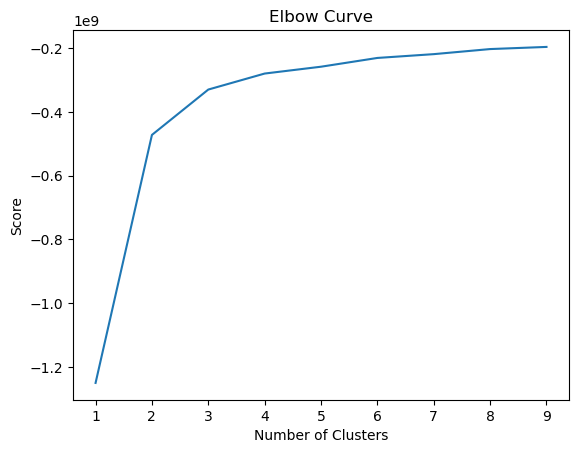

In [26]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## Comments:

The elbow curve bends sharply at 2 and 3 clusters, then levels off. Since 3 is the last major bend before the curve flattens, it seems like the optimal number of clusters.

### 3. k-means clustering

In [28]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [29]:
# Fit the k-means object to the data.

kmeans.fit(df_cwur_num)

KMeans(n_clusters=3)

In [34]:
#Attach a new column with clusters to df
df_cwur_num['clusters'] = kmeans.fit_predict(df_cwur_num)

In [31]:
df_cwur_num.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,clusters
0,1,1,7,9,1,1,1,1,1.0,5,100.00,2012,1
1,2,2,9,17,3,12,4,4,2.0,1,91.67,2012,1
2,3,3,17,11,5,4,2,2,4.0,15,89.50,2012,1
3,4,1,10,24,4,16,16,11,13.0,50,86.17,2012,1
4,5,4,2,29,7,37,22,22,24.5,18,85.21,2012,1


In [33]:
#Check value counts of the clusters
df_cwur_num['clusters'].value_counts()

clusters
2    807
1    719
0    674
Name: count, dtype: int64

## Create a few different visualizations (e.g., scatterplots) using clustered data.

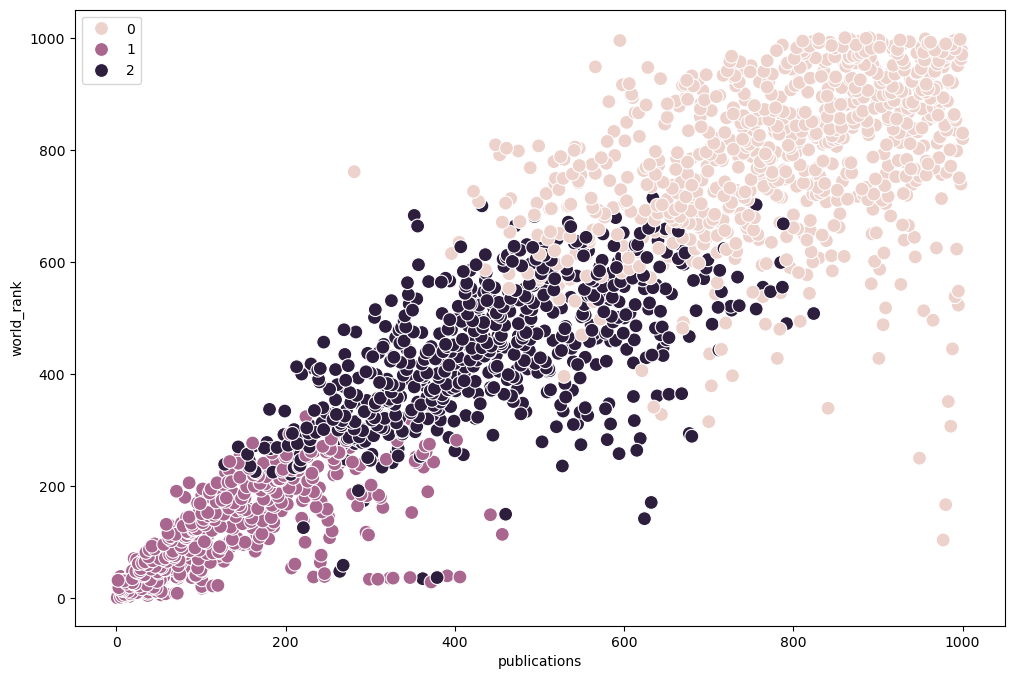

In [35]:
#Plot the clusters for the 'world rank' and 'publications' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cwur_num['publications'], y=df_cwur_num['world_rank'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('publications') 
plt.ylabel('world_rank') 
plt.show()

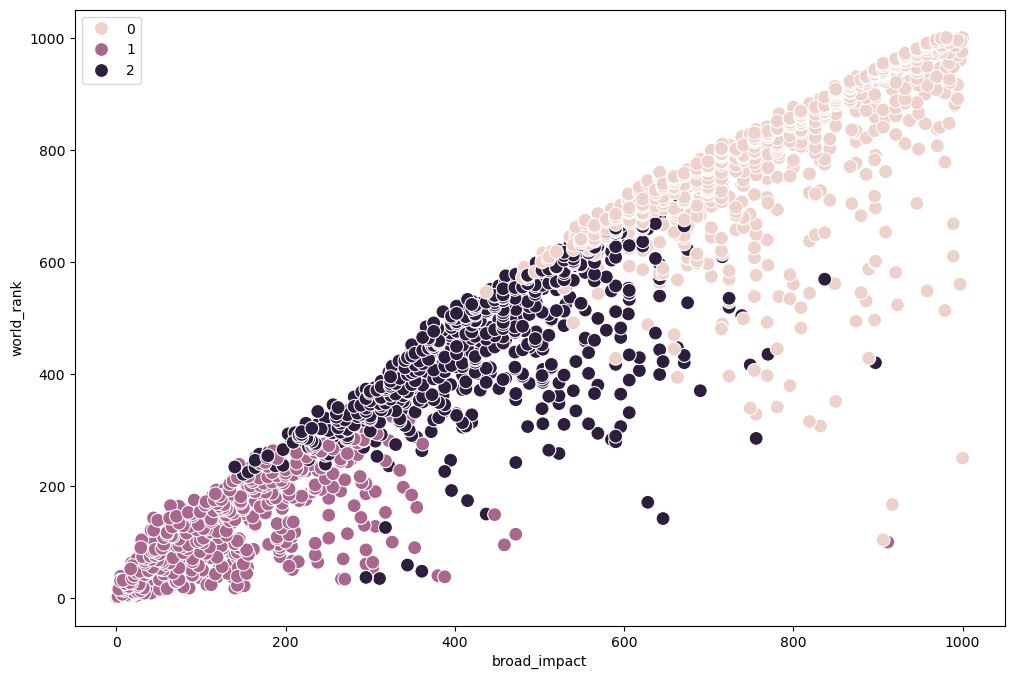

In [36]:
#Plot the clusters for the 'world rank' and 'broad impact' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cwur_num['broad_impact'], y=df_cwur_num['world_rank'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('broad_impact') 
plt.ylabel('world_rank') 
plt.show()

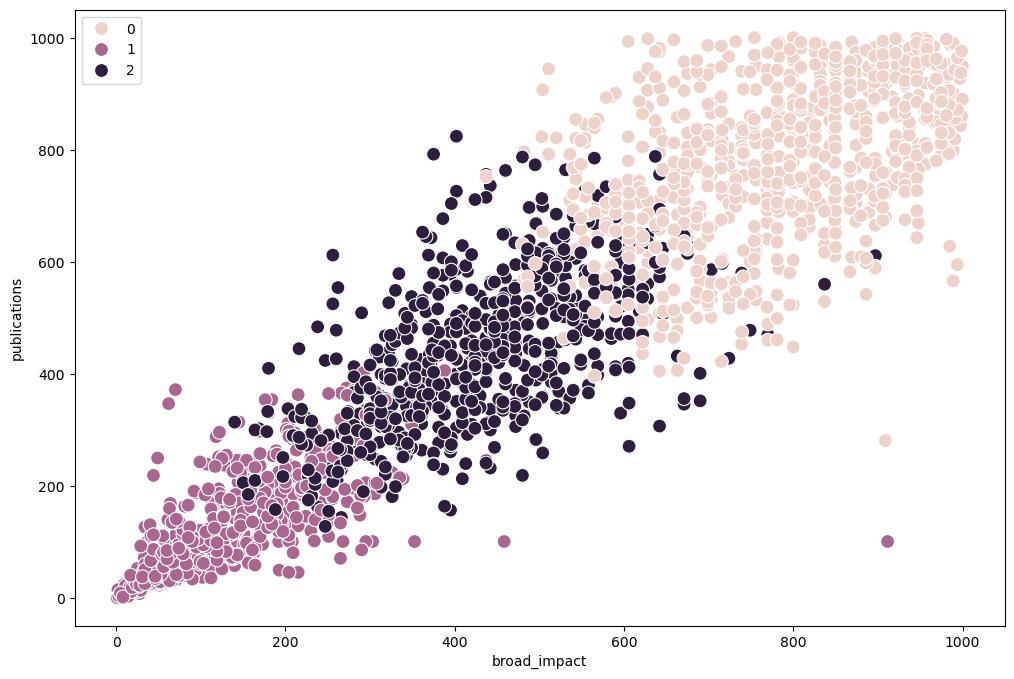

In [37]:
#Plot the clusters for the 'publications' and 'broad impact' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cwur_num['broad_impact'], y=df_cwur_num['publications'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('broad_impact') 
plt.ylabel('publications') 
plt.show()

## Comments:

These clusters make sense to me. They are distributed very evenly with a slight overlap from one cluster to another. I can't say that any of the clusters is more populated than another.However it looks like purple is a little smaller than dark purple and pink is a little bigger that the dark purle. This makes sense since in the rankings different universities are resresented with different ratings , broad impact and publications and it looks like the groups represented a more or less balanced. 

## Descriptive statistics for clusters using the groupby()

In [38]:
df_cwur_num.loc[df_cwur_num['clusters'] == 2, 'cluster'] = 'dark purple'
df_cwur_num.loc[df_cwur_num['clusters'] == 1, 'cluster'] = 'purple'
df_cwur_num.loc[df_cwur_num['clusters'] == 0, 'cluster'] = 'pink'

In [39]:
df_cwur_num.groupby('cluster').agg({
    'world_rank': ['mean', 'median'],
    'publications': ['mean', 'median'],
    'influence': ['mean', 'median'],
    'citations': ['mean', 'median'],
    'broad_impact': ['mean', 'median'],
    'score': ['mean', 'median']
})


world_rank        publications          influence         \
                   mean median         mean median        mean median   
cluster                                                                 
dark purple  434.544919  432.0   434.500736  426.0  441.846834  428.0   
pink         785.493235  797.0   781.225092  796.0  772.410824  792.0   
purple       109.375706   90.0   115.306497   99.0  118.038136  100.0   

              citations        broad_impact             score          
                   mean median         mean median       mean  median  
cluster                                                                
dark purple  429.974963  406.0   423.263623  420.0  45.442990  45.210  
pink         660.490775  645.0   783.354244  783.0  44.430443  44.380  
purple       113.822034   93.5   119.134830  101.0  53.924760  49.645

As we can see in the table, the Purple Cluster includes top universities with an average world rank of 109 and high research output, influence, and citations. Their mean values are slightly higher than the median, meaning a few lower-ranked universities bring the average down. The Dark Purple Cluster, ranked around 435, represents mid-tier universities with moderate research performance and a balanced distribution of values. The Pink Cluster, with universities averaging 785, shows much lower research output and influence. Since their mean and median values are close, their data is evenly spread. This makes sense, as better-ranked universities typically produce more research and have a greater impact, while lower-ranked ones struggle in these areas.

By grouping universities into clusters, we can better understand what makes top universities stand out and which are the main factors influencing the world rank. Also these insights can help predict which universities are likely to improve in the future, based on their research output and impact. Universities can use these clusters to set goals and compare themselves to similar institutions, helping them focus on areas that need improvement. In addition universities in the lower-ranked clusters could receive targeted support, like more funding or research opportunities, to help improve their performancen and world ranking.

In [40]:
#Export df_cwur_num
df_cwur_num.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_cwur_num.csv')) 